### Week 4 Assignment
### Sandhya Mainali
### Presidential Graduate School
### PRG 303: Python Programming
### Professor Pant
### March 30,2025

## Introduction to EDA
To identify the most significant features of datasets by graphical evaluation procedures, exploratory data analysis is a necessary step of the data analysis process. Statistical graphics and other visualization procedures are used by the method for investigators to identify significant variables, identify outliers, and examine the relationships among them as well as identify natural patterns of the data. The initial analysis is critical because it allows the evaluation of the data's quality as well as preparing it for further sophisticated investigation and makes the analytical procedures easier.

## DataSet Overview
The Nepal Rastra Bank has provided key economic data, like the growth of GDP, CPI prices, volumes of trade, analysis of the rate of interest of banks, and annual remittance inflow data.  The chosen factors suggest that they can provide data on the finance and economic stability of Nepal.  Time series of the rate of interest reflect the impact of the changes of the monetary policy on the country's economic conditions.  Nationals' significant contribution to family incomes and the growth of the GDP comes from their foreign work-based income.  Errors of report and information gaps in the records make data analysis less precise, making record-keeping challenging.

## Challenges and Observation
The compilation of these data sets is also confronted with several challenges, such as keeping accurate institution data and coping with the issue of missing reports and the disparate procedures of reportings. To analyze the remittance or the rate of interest, one must examine the available statistics as well as the global economic conditions, the economic policies, and the sociopolitical occurrences on the national and international levels.
Loading data and processing:
Economic data from Excel sheets go through Exploratory Data Analysis (EDA) procedures that can be handled easily with the provided Python script.It starts by importing data processing and display libraries, like seaborn, matplotlib, numpy, and pandas.  Using a reusable function called load_data, which can read Excel files with the capability of selecting sheets and columns, the script assigns file paths for some datasets, like remittance, trade, interest rate, growth of GDP, and CPI inflation.  These data then get imported into individual DataFrames.  To prepare the data for correct and meaningful analysis, the data cleansing process entails the elimination of duplicates, forward fill of gaps, and ensuring date columns hold the correct datetime format.  Plotting growth of GDP over time, the script's final example of a core visualization method, offers a graphical analysis of economic trends—a useful tool for spotting patterns and anomalies of data.This structured approach is flexible and scalable for most economic data, making initial data analysis easier and setting the stage for increasingly complex and advanced EDA work.

## Summarize major findings from the visualizations
- Line Graph of the CPI Inflation Rate Over Time:
    - Periods of increasing and decreasing cpi are represented by the fluctuations in the CPI inflation rate over time.
    - Inflated peaks can be caused by supply chain disruption, policy changes, or worldwide economic crises.
- Bar Graph
    - The exports of some countries are substantial while commercial relations with other nations are minimal.
    - The trade balance may be affected by reliance on a small number of major trading partners.
- Box plot
    - The boxplot is indicating possible anomalies or economic downturns when it displays the range in GDP growth.
    - Outliers may be a sign of great economic recessions or exceptional expansions.
- Heat Map
    - The central bank's policy effect on interest rates is seen in the close relationship between repo and reverse repo rates.
    - The degree to which monetary policies control price levels can be understood from the relation between interest rates and inflation.
- Scatter Plot
    - The scatter plot shows a potential negative correlation between GDP growth and inflation.
    - A strong negative relationship would mean that high inflation typically stifles economic growth.
- Bar Chart (Trade Deficit, Remittances & CPI Inflation)
    - Trade Deficit: An increasing trade deficit indicates a large import-export gap.
    - Remittance Inflows: The rising trend of remittances speaks volumes about their significance to the economy.
    - CPI Inflation: Together with trade and remittances, inflation trends travel in tandem, with potential implications for economic policy.

Error loading data/Remittance_Data.xlsx: File is not a zip file


'Mean values of the dataset:'

Remittance Inflow (Rs. billion)            NaN
Growth (%)                                 NaN
Exports (Rs. billion)                    154.4
Imports (Rs. billion)              1703.114286
Trade Deficit (Rs. billion)        1548.714286
Repo Rate (%)                              4.0
Reverse Repo Rate (%)                      4.5
CPI Inflation (%)                          5.5
GDP Growth (%)                        4.971429
dtype: object

'\nMedian values of the dataset:'

Remittance Inflow (Rs. billion)       NaN
Growth (%)                            NaN
Exports (Rs. billion)               144.3
Imports (Rs. billion)              1602.4
Trade Deficit (Rs. billion)        1458.1
Repo Rate (%)                         4.0
Reverse Repo Rate (%)                 4.5
CPI Inflation (%)                     5.6
GDP Growth (%)                        6.3
dtype: object

'\nStandard Deviation of the dataset:'

Remittance Inflow (Rs. billion)           NaN
Growth (%)                                NaN
Exports (Rs. billion)               59.146936
Imports (Rs. billion)              539.204159
Trade Deficit (Rs. billion)        481.326367
Repo Rate (%)                        1.354006
Reverse Repo Rate (%)                1.354006
CPI Inflation (%)                    1.251666
GDP Growth (%)                       3.262266
dtype: object

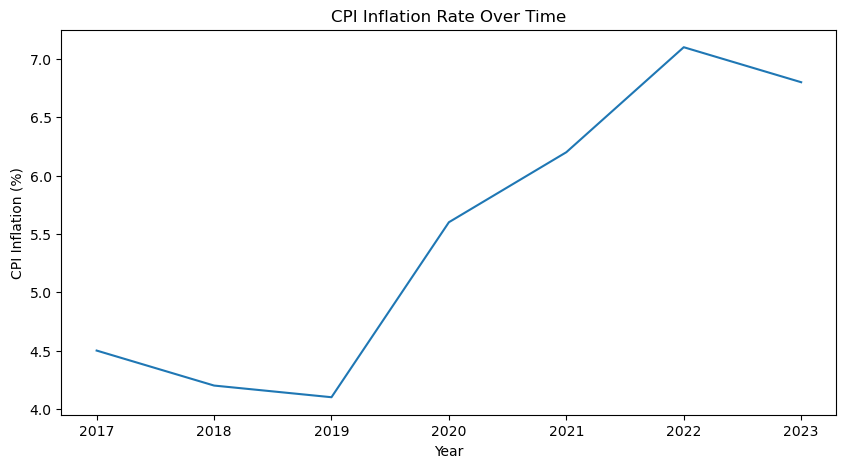

No 'Country' column in trade_data.


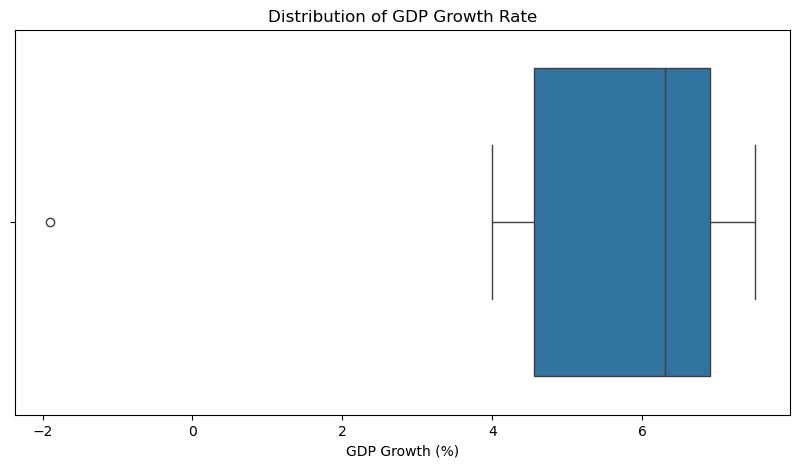

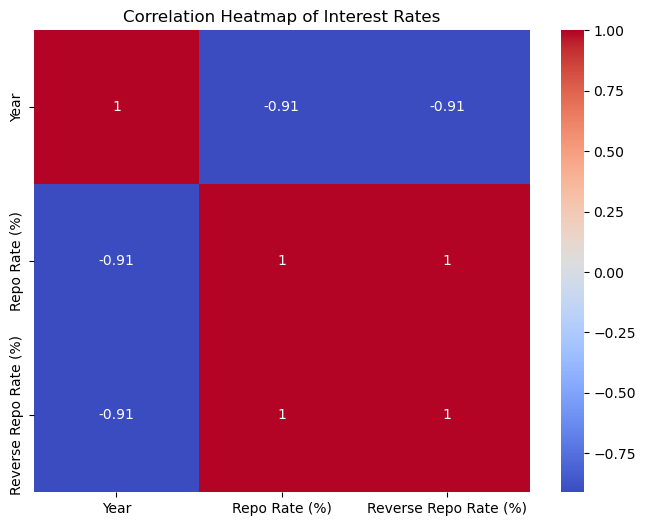

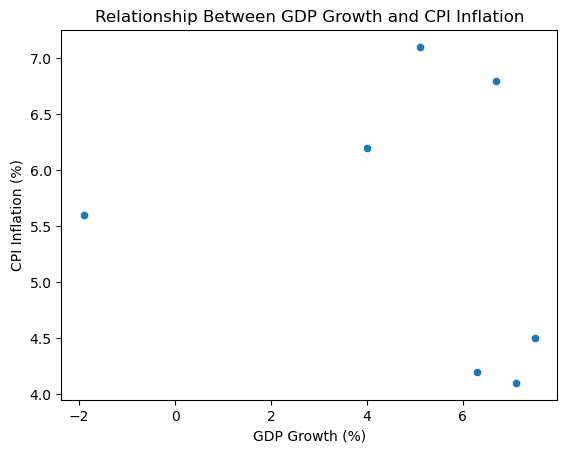

No 'Country' column in trade_data.


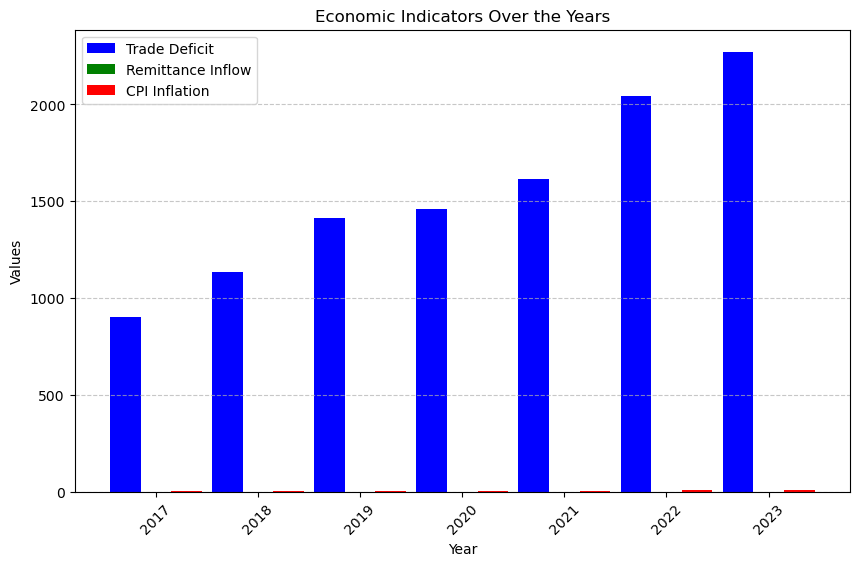

,Year,Remittance Inflow (Rs. billion),Growth (%),Exports (Rs. billion),Imports (Rs. billion),Trade Deficit (Rs. billion),Repo Rate (%),Reverse Repo Rate (%),CPI Inflation (%),GDP Growth (%)
0,2017-01-01,NaN,NaN,81.2,984.5,903.3,5.0,5.5,4.5,7.5
1,2018-01-01,NaN,NaN,97.1,1229.6,1132.5,5.5,6.0,4.2,6.3
2,2019-01-01,NaN,NaN,121.5,1534.7,1413.2,5.5,6.0,4.1,7.1
3,2020-01-01,NaN,NaN,144.3,1602.4,1458.1,4.0,4.5,5.6,-1.9
4,2021-01-01,NaN,NaN,187.2,1804.9,1617.7,3.0,3.5,6.2,4.0
5,2022-01-01,NaN,NaN,215.0,2258.6,2043.6,2.5,3.0,7.1,5.1
6,2023-01-01,NaN,NaN,234.5,2507.1,2272.6,2.5,3.0,6.8,6.7


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
from IPython.display import display

# Define the paths to your Excel files
remittance_path = "data/Remittance_Data.xlsx"
trade_path = "data/Trade_Data.xlsx"
interest_rates_path = "data/Interest_Rates_Data.xlsx"
gdp_growth_path = "data/GDP_Growth_Data.xlsx"
cpi_inflation_path = "data/CPI_Inflation_Data.xlsx"

# Function to safely load data from Excel
def load_data(file_path, columns):
    try:
        return pd.read_excel(file_path, engine='openpyxl')[columns]
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return pd.DataFrame(columns=columns)

# Load data from each Excel file
remittance_data = load_data(remittance_path, ["Year", "Remittance Inflow (Rs. billion)", "Growth (%)"])
trade_data = load_data(trade_path, ["Year", "Exports (Rs. billion)", "Imports (Rs. billion)"])
interest_rates_data = load_data(interest_rates_path, ["Year", "Repo Rate (%)", "Reverse Repo Rate (%)"])
gdp_growth_data = load_data(gdp_growth_path, ["Year", "GDP Growth (%)"])
cpi_inflation_data = load_data(cpi_inflation_path, ["Year", "CPI Inflation (%)"])

# Merge all datasets on the 'Year' column
data_frames = [remittance_data, trade_data, interest_rates_data, gdp_growth_data, cpi_inflation_data]
consolidated_data = reduce(lambda left, right: pd.merge(left, right, on='Year', how='outer'), data_frames)

# Convert 'Year' column to datetime format (if needed)
consolidated_data['Year'] = pd.to_datetime(consolidated_data['Year'], format='%Y', errors='coerce')

# Calculate the trade deficit
if 'Imports (Rs. billion)' in consolidated_data.columns and 'Exports (Rs. billion)' in consolidated_data.columns:
    consolidated_data['Trade Deficit (Rs. billion)'] = consolidated_data['Imports (Rs. billion)'] - consolidated_data['Exports (Rs. billion)']

# Reorder columns
column_order = ["Remittance Inflow (Rs. billion)", "Growth (%)", "Exports (Rs. billion)",
                "Imports (Rs. billion)", "Trade Deficit (Rs. billion)", "Repo Rate (%)",
                "Reverse Repo Rate (%)", "CPI Inflation (%)", "GDP Growth (%)"]
consolidated_data = consolidated_data[['Year'] + [col for col in column_order if col in consolidated_data.columns]]

# Compute statistics
mean_values = consolidated_data.drop(columns=["Year"]).mean()
median_values = consolidated_data.drop(columns=['Year']).median()
std_values = consolidated_data.drop(columns=['Year']).std()

display("Mean values of the dataset:")
display(mean_values)
display("\nMedian values of the dataset:")
display(median_values)
display("\nStandard Deviation of the dataset:")
display(std_values)


# Plotting

# Time Series Analysis for CPI Inflation Rate
plt.figure(figsize=(10, 5))
sns.lineplot(data=cpi_inflation_data, x='Year', y='CPI Inflation (%)')
plt.title('CPI Inflation Rate Over Time')
plt.show()

# Bar Charts for Exports by Country (assuming 'Country' column exists in trade_data)
if 'Country' in trade_data.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=trade_data, x='Country', y='Exports (Rs. billion)')
    plt.title('Exports by Country')
    plt.show()
else:
    print("No 'Country' column in trade_data.")

# Histograms and Boxplots for GDP Growth Rate
plt.figure(figsize=(10, 5))
sns.boxplot(data=gdp_growth_data, x='GDP Growth (%)')
plt.title('Distribution of GDP Growth Rate')
plt.show()

# Correlation Heatmaps for Interest Rates
plt.figure(figsize=(8, 6))
correlation_matrix = interest_rates_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Interest Rates')
plt.show()

# Scatter Plots to examine relationships (e.g., between GDP Growth and Inflation Rate)
# Assuming both metrics are in a combined DataFrame for illustrative purposes
combined_data = pd.merge(gdp_growth_data, cpi_inflation_data, on='Year')
sns.scatterplot(data=combined_data, x='GDP Growth (%)', y='CPI Inflation (%)')
plt.title('Relationship Between GDP Growth and CPI Inflation')
plt.show()
if 'Country' in trade_data.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=trade_data, x='Country', y='Exports (Rs. billion)')
    plt.title('Exports by Country')
    plt.show()
else:
    print("No 'Country' column in trade_data.")
plt.figure(figsize=(10, 6))
width = 0.3
x = consolidated_data['Year'].dt.year  


if 'Trade Deficit (Rs. billion)' in consolidated_data.columns:
    plt.bar(x - width, consolidated_data['Trade Deficit (Rs. billion)'], width=width, label='Trade Deficit', color='blue')
if 'Remittance Inflow (Rs. billion)' in consolidated_data.columns:
    plt.bar(x, consolidated_data['Remittance Inflow (Rs. billion)'], width=width, label='Remittance Inflow', color='green')
if 'CPI Inflation (%)' in consolidated_data.columns:
    plt.bar(x + width, consolidated_data['CPI Inflation (%)'], width=width, label='CPI Inflation', color='red')

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Economic Indicators Over the Years")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




# display("\nConsolidated Data:")
display(consolidated_data)


### Discuss patterns, trends, or anomalies identified in the data.

1. CPI Inflation (Bar Chart)
- The cost of living is significantly determined by CPI inflation, which measures the change in price of a basket of goods and services.  Inflation tends to rise and fall in cycles over time.  When demand from consumers is greater than supply, demand-pull inflation is typically indicated by a persistent rise in CPI inflation.  This can be attributed to times of economic boom or rises in wages.  If inflation, however, rises too quickly, it can wear away customers' purchasing power and boost the cost of goods and services.  In order to control inflation, central banks may raise interest rates in reaction to large rises in inflation, which may be an indication that the economy is overheating.  Inflation that is too low may be an indication of economic stagnation and weak demand. Therefore, any sudden changes or abnormalities, such as hyperinflation or deflation, can be an indication of significant economic disturbances that need the immediate attention of decision-makers.
- The bar chart would show the total exports per country (if the data contains the "Country" column).  It provides a visual display of export performance per country, which may be useful to identify principal markets and observe over-time changes in export dynamics.  This chart is not created if the "Country" column does not exist.


2. Box plot of GDP Growth Rate
- A country's overall economic well-being is indicated by GDP growth, with positive growth reflecting a growing industry and negative growth reflecting a contracting one.  Periods of rapid growth over time may be a sign of economic booms, which are often driven by innovation, investment, or favorable global circumstances.  Sudden drops in GDP growth, especially in global recessions, can reflect economic stress, though.  Government policy, investment in a nation, and shifts in the global economy can all influence the GDP growth rate.  Wild fluctuations or persistently slow growth may be indicative of underlying problems in the global economy or of a lack of efficiency.  Negative economic growth over a long duration of time can result in the loss of employment, decreased consumer spending, and overall economic instability.
- A box plot is used to display the distribution of the GDP growth rates, which shows the average, upper and lower quartiles, and any outliers.  It can show whether the economy has been quite stable or has experienced broad fluctuations over time, and it provides a measure of the overall volatility of GDP growth.

3. Heat Map
- The heatmap reveals whether a movement in one is related to a movement in the other by depicting the correlation between the rate of repo and reverse repo rate.  The relationship between these two most important interest rates and their possible effects on the overall economy are more comprehensible because of this chart.

4. Relationship Between GDP Growth and CPI Inflation (Scatter Plot)
- GDP growth is plotted against CPI inflation in this scatter graph, allowing identification of trends or relationships between inflationary pressures and economic growth. stronger growth may be associated with stronger inflation, according to a positive relationship, with the opposite being true for a negative relationship.

5. Economic Indicators Over Time (Bar Chart)
-  This bar chart lays out several economic indicators for each year side by side, including the trade deficit, remittance inflow, and CPI inflation.  It enables relative comparison of how variables shift over time, showing patterns and possible relationships.  Each indicator is made more identifiable by using a different color.

In offering information regarding trends and possible future trajectories of the economy, these visualizations present a strong method of reading and comprehending the intricate relationships between diverse economic data.

#### Possible reasons behind the observed trends.
- The rate of CPI inflation illustrates the way the cost of living fluctuates over time.  High inflation can be caused by monetary policy adjustments, supply disruptions, or greater demand that occurs when there is economic growth.  External influences, such as the devaluation of currency or global oil prices, can also determine inflation rates.

- Global demand, trade agreements, and competitiveness of a country's industries all help shape export trends.  Good economic health or favorable trade agreements increase exports, and a strong currency can deter exports.  Geopolitical incidents can also have a strong impact on export performance.

- Economic cycles, investment levels, and governmental policies all impact the level of GDP growth.  Economic expansions push GDP growth upwards and recessions push it downwards.  Worldwide recessions or natural disasters are some of the external shocks that can alter trends in GDP growth.

- Repo and reverse repo rates have a correlation, indicating the central bank's attempt to stabilize the economy and manage inflation.  Lower rates, in general, encourage borrowing and investment to fuel growth, while higher rates indicate an attempt to control inflation.

- Economic indices such as CPI inflation and remittance refer to the interplay between foreign trade, domestic output, and the impact of exogenous factors such as commodity prices and the world economic environment.Macro-economic indicators like payments and inflation in the consumer price index refer to the interplay between local production, foreign trade, and the impact of global factors like commodity prices and world economic performance. 

- A positive relationship between GDP growth and inflation means that as the economy grows, so does demand, and it pushes prices upwards. This could be an indicator of demand-induced inflation- where growth in the economy leads to higher costs due to increased consumer spending and business investment. Trade deficits happen when imports are more than exports, and remittance receipts can negate this deficit.



### Summary
- The EDA process comprised loading, cleaning, and merging data from a variety of sources in order to be able to examine major economic indicators such as GDP growth, inflation, interest rates, trade balance, and remittances.  Heterogeneity and primary patterns of the data were revealed by the computation of descriptive statistics.  Trade imbalances, the relationship between GDP growth and inflation, and volatile inflation were some of the patterns highlighted by visualizations such as line graphs, bar charts, and scatter plots.  From the findings, these indicators are extremely responsive to trade dynamics, economic cycles, and monetary policies, and they convey useful information on the health of the economy overall and its long-term trends.
- Among the weaknesses of the analysis are the possible problems with the completeness of the data and the lack of external variables like geopolitical events that may have an impact on the trends.  Observed correlations do not necessarily imply causation, and long-term trends may not be captured within the time horizon of the data set.  Inconsistencies can be generated by combining data from a multitude of sources, and the study may miss other pertinent variables since it simplifies complex economic systems.  On the basis of these limitations, the results have to be interpreted with caution, and further, more extensive research has to be carried out to draw more confident conclusions.